<div style="text-align: center; margin: 50px">

<h1 style="text-align: center;">Qubit by Qubit</h1>
<h2 style="text-align: center;">Introduction to Quantum Computing</h1>
<h3>Week 17 - Superdense Coding</h3>
<h3>Lab notebook</h3>

</div>

In [1]:
# Importing standard libraries
import numpy as np
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.quantum_info import random_unitary # This will be used in the optional content
print('Libraries imported successfully!')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Libraries imported successfully!


### This notebook contains more information and description of the steps of the protocol compared to previous lab notebooks. The Quantum Challenge strand of the course project will include similar notebooks that will walk you through implementations of various quantum protocols and algorithms! If you find this notebook interesting, we encourage you to attempt the Quantum Challenge once it starts in March :)

<a id="part1"></a>
# 1. The steps involved in superdense coding

Superdense coding is a quantum communication protocol that uses **entanglement** to communicate 2 bits of information while sending only 1 qubit. This protocol involves two parties (Alice and Bob) who wish to perform some communication task between them.

In superdense coding, we communicate classical information using hthe four Bell states. Recall that there are four Bell states:

$$|\beta_{00}\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle+|11\rangle\big)$$
$$|\beta_{01}\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle-|11\rangle\big)$$
$$|\beta_{10}\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle+|10\rangle\big)$$
$$|\beta_{11}\rangle = \frac{1}{\sqrt{2}}\big(|01\rangle-|10\rangle\big)$$

These entangled states carry two types of information - **parity** and **phase**. **Parity** refers to whether the two qubits, when measured, would return the same value or not. We can see that for the $|\beta_{00}\rangle$ and $|\beta_{01}\rangle$ states, both qubits are either 0, or both qubits are 1. For the $|\beta_{10}\rangle$ and $|\beta_{11}\rangle$, the two qubits are opposite - if one of them is 1, the other is 0. **Phase** refers to the sign between the two superposed two-qubit kets. For $|\beta_{00}\rangle$ and $|\beta_{10}\rangle$ this sign is +, whereas for $|\beta_{01}\rangle$ and $|\beta_{11}\rangle$ it is -.

In lecture, we looked at the steps of the superdense coding protocol:

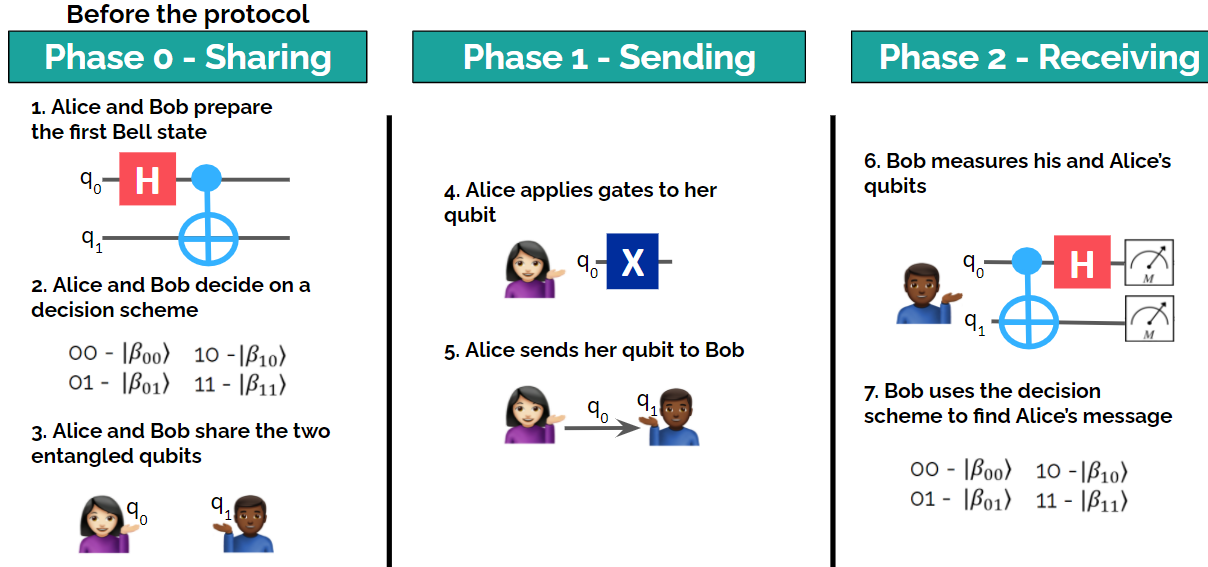

Let's implement each of these steps one-by-one!

# Phase 0 - Sharing

In this phase, Alice and Bob will prepare an entangled state of two qubits, and they will then share the two qubits. This phase happens before the protocol actually begins. Remember that **entanglement is the infrastructure for superdense coding** - it needs to be in place before the protocol can be used. In this step Alice and Bob are setting up this infrastructure.

<a id="part1a"></a>
## Step 1: Alice and Bob entangled two qubits

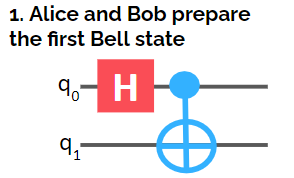

The first step in the superdense coding protocol is preparation of a two qubit entangled state. You will recognize this state as $|\beta_{00}\rangle$, the first Bell state. We have seen how this state is prepared already in labs over the past two weeks!

In the Block 1, write code to create a 2-qubit circuit and add an H and CX gate to create an entangled state.

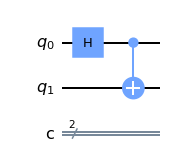

In [10]:
# Block 1 - implement step 1 of superdense coding
qc_sdc = QuantumCircuit(2,2)
qc_sdc.h(0)
qc_sdc.cx(0,1)
qc_sdc.draw()

After this state is prepared, Alice takes $q_0$, and Bob takes $q_1$. The two qubits still remain entangled - distance does not affect entanglement. As long as the qubits are not measured (or subjected to environmental noise), they stay entangled.

## Step 2 - Alice and Bob decide on a decision scheme

No coding required here! In this step, Alice and Bob decide which 2-bit message will be communicated by which of the four Bell states. As we discussed in lecture, here is the decision scheme that is conventionally used:

| Intended Message | Bell State |
|:----------------:|:---------------:|
| 00 |$$\tfrac{1}{\sqrt{2}}\big(|00\rangle+|11\rangle\big)=|\beta_{00}\rangle$$ |
| 01 |$$\tfrac{1}{\sqrt{2}}\big(|00\rangle-|11\rangle\big)=|\beta_{01}\rangle$$ |
| 10 |$$\tfrac{1}{\sqrt{2}}\big(|01\rangle+|10\rangle\big)=|\beta_{10}\rangle$$ |
| 11 | $$\tfrac{1}{\sqrt{2}}\big(|01\rangle-|10\rangle\big)=|\beta_{11}\rangle$$ |

So, for example, to send the message 01 Alice would prepare the $|\beta_{01}\rangle$ Bell state.

## Step 3 - Alice and Bob share the two entangled qubits

Again, no coding required here! Alice and Bob would end the preliminary phase by sharing the two entangled qubits between them. Alice takes $q_0$, and Bob takes $q_1$.

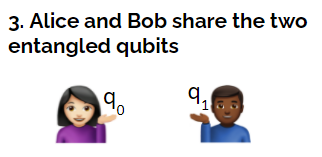

# Phase 1 - Sending

Now that we are done with the preliminaries, let's start coding the actual protocol! In Phase 1, Alice will decide which message she wants to send Bob, and apply the right gates to her qubit to send this message. Then, she will send her qubit q0 to Bob!

<a id="part1c"></a>
## Step 4 - Alice applies gates to her qubit

In this step, Alice encodes the 2 classical bits she wants to send onto her qubit. How does she do this?

Remember that the goal is to send 1 of 4 possible classical messages - 00, 01, 10, and 11. Using the decision scheme in Step 2, Alice knows exactly which Bell state she needs to prepare for each of the 4 possible 2-bit messages she wants to send.

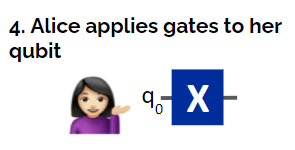

The current 2-qubit state shared by Alice and Bob is $|\beta_{00}\rangle$. So, if Alice wants to send 00, she doesn't need to do anything more!

If she wants to send any of the other messages, she has to prepare the other 3 Bell states. We know the circuit to prepare each of the other 3 Bell states from last week's lab!

### Question: Do you remember which gates we added to the $|\beta_{00}\rangle$ Bell state to prepare each of the other Bell states?

Here are the gates Alice applies for each of the 4 Bell states:


| Intended Message | Gate Alice Applies | Resulting State |
|:----------------:|:--------------------------:|:---------------:|
| 00 | no gates | $$\tfrac{1}{\sqrt{2}}\big(|00\rangle+|11\rangle\big)=|\beta_{00}\rangle$$ |
| 01 | $$Z$$ | $$\tfrac{1}{\sqrt{2}}\big(|00\rangle-|11\rangle\big)=|\beta_{01}\rangle$$ |
| 10 | $$X$$ | $$\tfrac{1}{\sqrt{2}}\big(|01\rangle+|10\rangle\big)=|\beta_{10}\rangle$$ |
| 11 | $$Z\cdot X$$ | $$\tfrac{1}{\sqrt{2}}\big(|01\rangle-|10\rangle\big)=|\beta_{11}\rangle$$ |

Alice's qubit is the first from right (remember we are using right indexing) and Bob's is the second. So in this step, Alice applies the gate according to the table above, while Bob leaves his qubit (the second) in the same state. **Bob does not know which gates Alice applies.**

Thus if she wants to send $00$, she does nothing to her qubit. If she wants to send $01$, she applies the $X$ gate to her qubit, and so on for the other bit combinations. Depending on what she wants to send, she applies the appropriate gate, then sends her qubit to Bob for the final step in the process.

Note that Alice does not need access to Bob's qubit q1 to prepare the right Bell state! She only needs to apply the right gate to her own qubit q0. This is the advantage of using an entangled state - changes that she makes to her qubit change the overall 2-qubit state, because her qubit is entangled with Bob's qubit!

### Let's say that Alice wants to send the message 11. Based on the table above, which gate does she need to apply?

In Block 2 below, apply the correct gate to the circuit you made in Block 1.

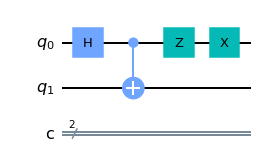

In [11]:
## Block 2 - Apply the right gate to the circuit from Block 1 to send the message "11". 
# Note: Only run this block once! If you run this block multiple times, the gates will get added to your circuit many times
# If you accidentally run this block more than once, go back and run Block 1 again, and then run Block 2.

qc_sdc.z(0)
qc_sdc.x(0)
qc_sdc.draw()

<a id="part1d"></a>
## Step 5 - Alice sends Bob her qubit

Again, nothing to code here. After encoding her 2 qubit message, Alice transmits her qubit to Bob. For example, if the qubits are photons, she could transmit her photon on an optical fibre. 

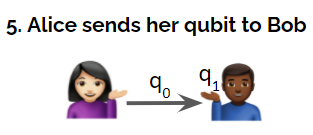

# Phase 2 - Bob makes measurements

The final phase! In this phase of the protocol, Bob is going to receive Alice's qubit q0. Bob now has both q0 and q1. Bob will make Bell measurements on the two qubits to figure out which of the four Bell states Alice sent!

<a id="part1e"></a>
## Steps 6&7 - Bob makes Bell measurements on the two qubits and deciphers Alice's message

Having received Alice's qubit, Bob now has to find out her message by making Bell measurements.

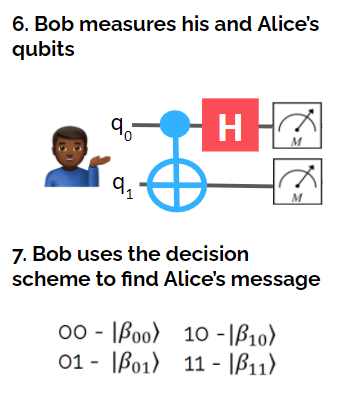

### Why does Bob need Bell measurements?

Bob needs a way to tell the four Bell states apart with 100% probability. If he can find a way to do this, he can successfully decode Alice's message.

A simple measurement of the 2 qubits is not going to be enough. We have seen last week that, for example, both the $|\beta_{00}\rangle$ and $|\beta_{10}\rangle$ states give outputs 00 and 11 with probability 50/50. Could we measure the Bell states differently so that we can tell these states apart?

Let's think back to what these four states have in common, and what is different between them. 

**When we prepared the states, there was a common part** - we first applied an H gate, and then a CX gate. Next came the gates that differentiated the four states. If we could somehow "remove" the effects of the common part, maybe we can tell the four states apart!

This is the motivation behind **Bell basis measurements**. By undoing the "common" part of the circuit (CX and H gates) in which the Bell states were prepared, we can deterministically tell the four Bell states apart.

For more details about the math behind this idea, refer to the lecture slides/recording. Here, we'll focus on the intuition of reversing the common part of the circuit to tell apart the 4 Bell states.

### Bell measurement circuit

The Bell measurement circuit 'undoes' the common part of the Bell state preparation circuit. It first applies a CX gate, and then an H gate, to the 2-qubit state. This is exactly the reverse of the order in which we had applied these gates earier.

In Block 3 below, let's add these gates to the circuit so that Bob can find out which state Alice sent him!

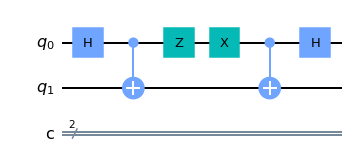

In [12]:
# Block 3 - Add the correct gates for Bob to make a Bell measurement
qc_sdc.cx(0,1)
qc_sdc.h(0)
qc_sdc.draw()

Here is what Bob expects to get after this measurement (remember that Bob's qubit is the second from the right):


| Bob Receives | After CX gate | After H gate | Classical bits after measurement
|:------------:|:----------------:|:------------:|:------------:|
| $$|00\rangle+|11\rangle$$ | $$|00\rangle+|01\rangle$$ | $$|00\rangle$$ | 00 |
| $$|01\rangle+|10\rangle$$ | $$|11\rangle+|10\rangle$$ | $$|10\rangle$$ | 10 |
| $$|00\rangle-|11\rangle$$ | $$|00\rangle-|01\rangle$$ | $$|01\rangle$$ | 01 |
| $$|01\rangle-|10\rangle$$ | $$|11\rangle-|10\rangle$$ | $$|11\rangle$$ | 11 |



Let's make measurements to see what Bob gets! Add measurements to both qubits in your circuit in Block 4.

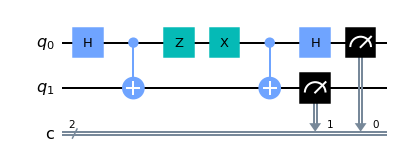

In [13]:
# Block 4 - Let's add measurements to our circuit to see what Bob gets!
# Draw the final circuit
qc_sdc.measure([0,1],[0,1])
qc_sdc.draw()

Let's see if Bob receives the correct message! In Block 5, run the circuit on the QASM simulator and plot the result as a histogram.

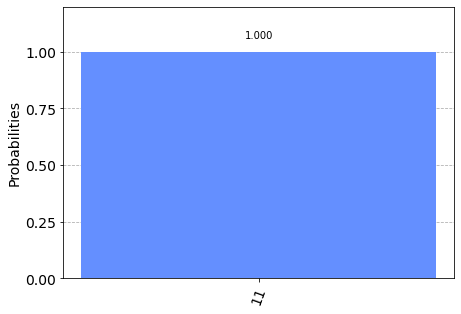

In [14]:
# Block 5 - Run the superdense coding circuit on the QASM simulator and plot the result as a histogram. Does Bob get the right result?
backend = Aer.get_backend('qasm_simulator')
job = execute(qc_sdc, backend, shots=1024)
result = job.result()

counts = result.get_counts()
plot_histogram(counts)


**Bob decodes the message successfully every time!** The Bell measurement works, and Bob gets Alice's measurement.

## Exercise - try out the code for the messages 00, 01, and 10! Does Bob still get the right message?

<a id="part3"></a>
# Key Takeaways

1. Superdense coding allows Alice to send Bob a classical message consisting of 2 bits by transferring only 1 qubit. A prerequisite for superdense coding is that Alice and Bob share a 2-qubit entangled state.

2. In superdense coding, Alice prepares one of 4 Bell states to encode her message by applying single qubit gates to her qubit. Then, she sends her qubit to Bob.

3. After receiving Alice's qubit, Bob applies a Bell measurement on both qubits to decode Alice's measurement. In this measurement, he first apples a CX gate and then an H gate to undo the "common" part of the state preparation circuit. Finally, he measures the 2 qubits. Bell measurements distinguish between the 4 Bell states with 100% probability.


<a id="part4"></a>
# Further Reading and Resources

[Video on Superdense Coding from Prof. Michael Nielsen](https://www.youtube.com/watch?v=w5rCn593Dig)

[Qiskit textbook page on superdense coding](https://qiskit.org/textbook/ch-algorithms/superdense-coding.html)

[Experimental demonstration of superdense coding](https://www.osti.gov/biblio/1343530)

<a id="part6"></a>
# Optional Content

## Running your superdense coding circuit on an actual quantum computer

We can now see superdense coding working on a real quantum computer. First, we want to get the least busy quantum system:

In [15]:
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
IBMQ.load_account()
# Get the least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_lima


Next, let's run our circuit on the least busy backend!

In [17]:
# Run our circuit
job = execute(qc_sdc, backend=backend, shots=shots)

To know the status of our job, we can monitor it:

In [18]:
# Monitoring our job
from qiskit.tools.monitor import job_monitor
job_monitor(job)


Job Status: job has successfully run


When the job has finished, we can review the results:

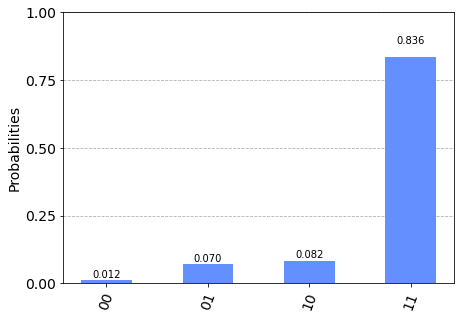

In [19]:
# Plotting our result
result = job.result()
plot_histogram(result.get_counts())


As we see that there are a few results from the other three states when run in a real quantum computer. These are due to errors in the gates and qubit decoherence. We can find the accuracy of Bob's meausrements as shown in the block below:

In [21]:
correct_results = result.get_counts()['11']
accuracy = (correct_results/shots)*100
print("Accuracy = %.2f%%" % accuracy)


Accuracy = 83.59%
